In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime,date
import math
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
ncl = pd.read_excel('Raw_data.xlsx', sheet_name = 'NewCustomerList')

In [3]:
ncl.head()

,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,...,state,country,property_valuation,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Rank,Value
0,Chickie,Brister,Male,86,1957-07-12,General Manager,Manufacturing,Mass Customer,N,Yes,...,QLD,Australia,6,0.81,1.0125,1.265625,1.075781,1,1,1.718750
1,Morly,Genery,Male,69,1970-03-22,Structural Engineer,Property,Mass Customer,N,No,...,NSW,Australia,11,0.75,0.7500,0.937500,0.796875,1,1,1.718750
2,Ardelis,Forrester,Female,10,1974-08-28,Senior Cost Accountant,Financial Services,Affluent Customer,N,No,...,VIC,Australia,5,0.71,0.7100,0.710000,0.710000,1,1,1.718750
3,Lucine,Stutt,Female,64,1979-01-28,Account Representative III,Manufacturing,Affluent Customer,N,Yes,...,QLD,Australia,1,0.50,0.6250,0.625000,0.625000,4,4,1.703125
4,Melinda,Hadlee,Female,34,1965-09-21,Financial Analyst,Financial Services,Affluent Customer,N,No,...,NSW,Australia,9,0.99,0.9900,1.237500,1.237500,4,4,1.703125


The columns named unnamed:16 to unnamed:20 are not really useful to us as they do not give us any kind of relevant information. So, we drop them.

In [4]:
ncl.drop(['Unnamed: 16','Unnamed: 17', 'Unnamed: 18','Unnamed: 19','Unnamed: 20'], axis = 1, inplace = True)

In [5]:
ncl.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 18 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   first_name                           1000 non-null   object        
 1   last_name                            971 non-null    object        
 2   gender                               1000 non-null   object        
 3   past_3_years_bike_related_purchases  1000 non-null   int64         
 4   DOB                                  983 non-null    datetime64[ns]
 5   job_title                            894 non-null    object        
 6   job_industry_category                835 non-null    object        
 7   wealth_segment                       1000 non-null   object        
 8   deceased_indicator                   1000 non-null   object        
 9   owns_car                             1000 non-null   object        
 10  tenure       

In [6]:
ncl.shape

(1000, 18)

### Checking Missing Values

In [9]:
ncl.isnull().mean()*100

first_name                              0.0
last_name                               2.9
gender                                  0.0
past_3_years_bike_related_purchases     0.0
DOB                                     1.7
job_title                              10.6
job_industry_category                  16.5
wealth_segment                          0.0
deceased_indicator                      0.0
owns_car                                0.0
tenure                                  0.0
address                                 0.0
postcode                                0.0
state                                   0.0
country                                 0.0
property_valuation                      0.0
Rank                                    0.0
Value                                   0.0
dtype: float64

Checking if first name is also null when last name is null

In [10]:
ncl[ncl['last_name'].isnull()].isnull().sum()

first_name                              0
last_name                              29
gender                                  0
past_3_years_bike_related_purchases     0
DOB                                     0
job_title                               3
job_industry_category                   6
wealth_segment                          0
deceased_indicator                      0
owns_car                                0
tenure                                  0
address                                 0
postcode                                0
state                                   0
country                                 0
property_valuation                      0
Rank                                    0
Value                                   0
dtype: int64

This implies that when last name is null then we still have first name which make all customers identifiable.

Therefore, we fill the null last names with 'Unknown'

In [11]:
ncl['last_name'].fillna('Unknown', axis = 0, inplace = True)

In [12]:
ncl['last_name'].isnull().sum()

0

In [13]:
ncl['DOB'].isnull().mean()*100

1.7000000000000002

The percentage of null values are very small for the DOB column. So, dropping it.

In [14]:
ncdob = ncl[ncl['DOB'].isnull()].index

In [15]:
ncl.drop(ncdob,axis = 0,inplace = True)

In [16]:
ncl['DOB'].isnull().sum()

0

Checking for age consistency

In [18]:
from datetime import timedelta

In [25]:
# Creating an age column
def Age(birthdate):
    today = date.today() - timedelta(days = 7*365)
    return today.year - birthdate.year - ((today.month, today.day) < (birthdate.month, birthdate.day))

In [26]:
ncl['age'] = ncl['DOB'].apply(Age)

In [27]:
ncl['age'].describe()

count    983.000000
mean      46.189217
std       17.074141
min       15.000000
25%       34.000000
50%       45.000000
75%       60.000000
max       79.000000
Name: age, dtype: float64

In [30]:
sns.set_style('darkgrid')
plt.figure(figsize = (10,8))

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<AxesSubplot:xlabel='age'>

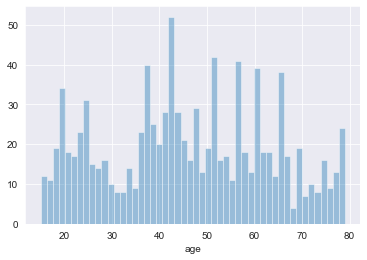

In [31]:
sns.distplot(ncl['age'], bins = 50,kde = False)

Age column is consistent as we did not find any significant gaps. The age distribution looks smooth. Peaks and troughs across the bins seem reasonable and likely reflect natural variation, not anomalies. 

Creating Age group column as it lets us decide which age group contributes to the highest no. of new customers.

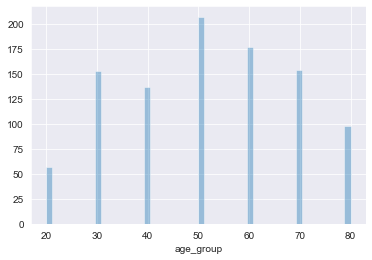

In [33]:
ncl['age_group'] = ncl['age'].apply(lambda x : (math.floor(x/10)+1)*10)
sns.distplot(ncl['age_group'], kde = False, bins =50)
plt.show()

Here 20 means under 20, 30 = 20-29...

Now we check if the null values in  job_title and job_industry_category columns affect the first_name column.

In [36]:
ncl[ncl['job_title'].isnull()][['first_name']].isnull().sum()

first_name    0
dtype: int64

In [37]:
ncl[ncl['job_industry_category'].isnull()][['first_name']].isnull().sum()

first_name    0
dtype: int64

Since new customers are identifiable and the null value percentage of job_title and job_industry_category are quite high. So, we just replace them with 'Unknown'.                  

In [38]:
ncl['job_title'].replace(np.nan,'Unknown',inplace = True)

In [39]:
ncl['job_industry_category'].replace(np.nan,'Unknown',inplace = True)

In [40]:
ncl.isnull().sum()

first_name                             0
last_name                              0
gender                                 0
past_3_years_bike_related_purchases    0
DOB                                    0
job_title                              0
job_industry_category                  0
wealth_segment                         0
deceased_indicator                     0
owns_car                               0
tenure                                 0
address                                0
postcode                               0
state                                  0
country                                0
property_valuation                     0
Rank                                   0
Value                                  0
age                                    0
age_group                              0
dtype: int64

### Performing Quality Check

In [41]:
ncl['gender'].value_counts()

Female    513
Male      470
Name: gender, dtype: int64

In [42]:
ncl['wealth_segment'].value_counts()

Mass Customer        499
High Net Worth       249
Affluent Customer    235
Name: wealth_segment, dtype: int64

In [43]:
ncl['deceased_indicator'].value_counts()

N    983
Name: deceased_indicator, dtype: int64

In [45]:
df = ncl[['owns_car', 'state']]
df.stack().value_counts()


NSW    499
No     497
Yes    486
VIC    258
QLD    226
dtype: int64

In [48]:
ncl['tenure'].describe()

count    983.000000
mean      11.459817
std        5.006123
min        1.000000
25%        8.000000
50%       11.000000
75%       15.000000
max       22.000000
Name: tenure, dtype: float64

<AxesSubplot:xlabel='tenure', ylabel='Density'>

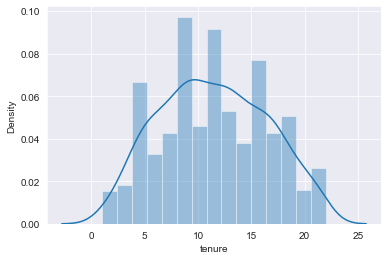

In [49]:
sns.distplot(ncl['tenure'])

The plot seems good.

In [46]:
ncl['country'].value_counts()

Australia    983
Name: country, dtype: int64

In [47]:
ncl[['address', 'postcode','state','country']].sort_values('address')

,address,postcode,state,country
721,0 Bay Drive,2750,NSW,Australia
138,0 Dexter Parkway,2380,NSW,Australia
624,0 Emmet Trail,4128,QLD,Australia
300,0 Esker Avenue,4019,QLD,Australia
685,0 Express Lane,2142,NSW,Australia
...,...,...,...,...
308,99 Westend Court,2287,NSW,Australia
336,990 Hoffman Avenue,3029,VIC,Australia
796,99376 Namekagon Street,3101,VIC,Australia
583,9940 Manley Drive,2574,NSW,Australia


All the columns have been checked for inconsistencies

### Duplication Check

In [51]:
ncl_dr_dup = ncl.drop_duplicates()
ncl_dr_dup.shape

(983, 20)

In [52]:
ncl.shape

(983, 20)

No duplicated records found.

In [53]:
ncl.to_csv('Clean_NewCustomerList.csv', index = False)